# From the students' grades in other subjects, can we predict how they score in mathematics?

data:
* training.json
* sample-test.in.json
* sample-test.out.json

In [14]:
# Enter your code here. Read input from STDIN. Print output to STDOUT

import pandas as pd 
import json

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
num_lines = 69530 #int(input())

In [8]:
#inputs = [json.loads("train.txt") for _ in range(num_lines)]
#test_df = pd.DataFrame(num_lines).fillna(0)
with open('training.json') as f:
    data = [json.loads(line) for line in f]
    data.remove(data[0])
    train_df = pd.DataFrame(data).fillna(0)
    
test_df = pd.read_csv("sample-test.out.json", header = None, names = ["grade"])

In [9]:
train_df.head()

,Accountancy,Biology,BusinessStudies,Chemistry,ComputerScience,Economics,English,Mathematics,PhysicalEducation,Physics,serial
0,0.0,0.0,0.0,7.0,0.0,0.0,4,6,3.0,8.0,195490
1,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,1.0,190869
2,0.0,0.0,0.0,2.0,0.0,0.0,1,2,2.0,1.0,3111
3,0.0,0.0,0.0,7.0,0.0,0.0,7,7,6.0,8.0,47738
4,0.0,0.0,0.0,1.0,0.0,0.0,3,2,1.0,1.0,85520


In [10]:
test_df

,grade
0,2
1,4
2,1
3,2
4,8
5,5
6,8
7,4
8,5
9,1


In [6]:
train_df.describe()

,Accountancy,Biology,BusinessStudies,Chemistry,ComputerScience,Economics,English,PhysicalEducation,Physics,serial
count,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000
mean,0.437213,0.677214,0.481296,3.290469,0.916121,0.431805,3.046959,1.266853,3.306980,111347.639086
std,1.202609,1.670681,1.332722,2.469943,1.946385,1.173290,1.783387,1.963182,2.517914,64342.237044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,55645.000000
50%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,3.000000,111348.000000
75%,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,2.000000,5.000000,167037.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,222845.000000


In [11]:
train_df.isna().sum()

Accountancy          0
Biology              0
BusinessStudies      0
Chemistry            0
ComputerScience      0
Economics            0
English              0
Mathematics          0
PhysicalEducation    0
Physics              0
serial               0
dtype: int64

We don't need to clean the data. 

In [30]:
X = train_df.drop(columns=["serial","Mathematics"])
X.Mathmatics = train_df.Mathematics

corr = X.corr()

/home/robin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


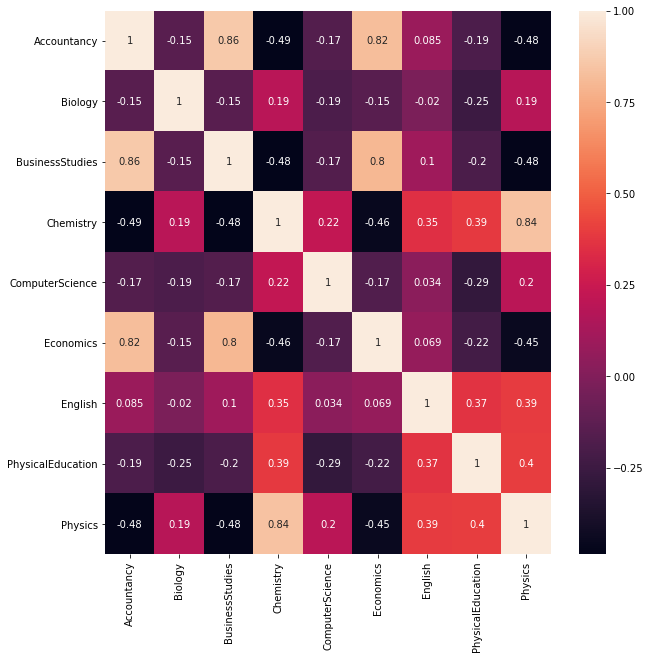

In [31]:

plt.figure(figsize=[10,10])
sns.heatmap(corr, annot=True)